# Modelling the Camera


## Orthographic}
This is fairly simple. 
If your projection is from the origin of the world 3D coordinates then to find the 2D projection you just drop the third coordinate.

This is of limited use as cameras don't really work this way (there are telecentric lenses that do), but it can be a good approximation if your camera position is very far away (theoretically it should be infinity).

So it's a reasonable approximation for telephoto lenses.

## Perspective Projection -  Pinhole Camera Model

The pinhole camera model (and similarly the thin lens model) work on the principle of _similar triangles_.

See the diagram below.

A world point $\mathbf{X} \in \mathbb{R}^3$ is mapped to an image point $\mathbf{x} \in \mathbb{R}^2$.




![](images/pinholeCamera.jpg)

Now we have to decide where the origin is. 

We can decide this arbitrarily as long as we stick to it. 

If the origin is at the camera sensor we have the figure below 


![](images/OriginAtSensor.jpg)

If the origin is at the pinhole we have the figure below. 
 
The formulae are different and as you can see the pinhole version is a little simpler so we will use that one.


![](images/originAtPinhole.jpg)
You will note that the image formed on the sensor is upside down. 

We don't show it, but it shouldn't take too much imagination to see that it will also be be flipped left for right. 

This is not a problem, as we can easily flip these in software or just read off the sensor data upside down and backwards. 

You may have noticed that the front camera on your mobile phone only flips the image vertically but not left for right. 

People are used to seeing themselves in a mirror so if taking a photo of themselves this is how they expect it to behave. 

Most people also prefer their image in a mirror to their actual image, so the readout of the selfie camera can be set to this too.

It is worth noting that this also happens in the human eye and our brain does the flip or we believe it does.
Interestingly, people have done experiments with headsets that flip the image upside down and it only takes a day or two for the brain to adjust to this new norm.


[Clip from BBC documentary, cycling with the world upside down.](https://www.youtube.com/watch?v=-kohUpQwZt8)
 

We can make our lives easier by pretending that the image plane is in front of the pinhole instead of behind. 

The maths still works accept the minus sign is removed. 

See below. This is the idea we will use from now on unless we have to make an exception.


![](images/sensorInFront.jpg)

Now this allows us to link to the idea we used for homogeneous coordinates. 

Our image plane is at $f$ (the focal length). 

The Homogeneous plane can be anywhere, but by convention we used $(Z=1)$. 

If we have a world point at $(X=4, Y=5, Z=3)$ and our focal length is $f=2$ (don't worry about units yet).

Treat the world coordinate as a homogeneous 2D coordinate.

So the 2D coordinates in the plane at ($Z=1$) would be $\frac{4}{3}, \frac{5}{3}$. 

If we project the image on the plane at $Z=1$ out to the focal length $(Z=f=2)$ then we get 2D coordinates  $(\frac{2\times4}{3}, \frac{2\times5}{3})$.

I.e. in the general case we get 2D image coordinates $(\frac{fX}{Z}, \frac{fY}{Z})$.

       

## Camera Intrinsic and Extrinsic Parameters
So here is what we have to do.
We must go from

World coords (3D) $\to$ Camera coords (3D) $\to$ Image coords (2D) $\to$ Pixel coords (2D Discrete).

So we start with a vector in 3D and we change this to homogeneous Coordinates in 4D. 
We will call this $\textbf{X} = (X, Y, Z, 1)^{\top}$. 

And this is relative to some world coordinate frame, it will be important to know or decide where the origin of the world coordinate frame is.

Next we need to transform this vector to a coordinate relative to the camera origin, which we decided was either the pin hole or the center of the lens. 
This requires the vector to under go rigid body motion based on the **Extrinsic** parameters of the camera. So these include translation and rotation.

So this has moved the vector from the world frame to the camera frame.

In effect what we are doing is moving the 3D origin from the world to the pinhole of the camera and all the vectors must move relative to that. 
The rotation is because the axis of the origin at the camera may be different from the world frame because the camera is rotated in some way.

Next we need to transform the 3D coordinate to a 2D image coordinate. 

This will require a change from 4D Homogeneous to 3D Homogeneous. 

We will simply drop one dimension and divide the first two coordinates by the third and multiply by the focal length. 

Warning: dividing across by the third coordinate is a non-linear operation. 

It's nothing we can't handle, but it makes a mess of our elegant linear algebra. 

For this reason we take it outside the equation and put it on the other side of the equals. It's denoted below as $\lambda$. 

Note that it is not Z as that is the world coordinate that undergoes a lot of changes before it becomes the third coordinate of the final homogeneous image vector.
 



The final thing we need to do is change the 2D coordinates to 2D discrete which means quantizing the space into pixels and usually means shifting the origin to one corner of the sensor. 

The most obvious choice being the top-left of the final image when it has righted itself but this is manufacturer dependent.

The focal length, and the scale factors for the pixels in both x and y are referred to as the **Intrinsic** Camera parameters.
 

Any distortions or differences from the pinhole model are also included under the heading of the camera Intrinsic parameters but may or may not be dealt with directly here and may be modified later in software.


$$\lambda \begin{bmatrix}
                x\\
                y\\
                1
            \end{bmatrix} = \begin{bmatrix}
                s_x    & 0 & O_x  \\
                0     & s_y & O_y  \\
                0     & 0 & 1  
            \end{bmatrix}
                \begin{bmatrix}
                f    & 0 & 0 \\
                0     & f & 0  \\
                0     & 0 & 1  
            \end{bmatrix}
                \begin{bmatrix}
                1    & 0 & 0 & 0 \\
                0     & 1 & 0 & 0 \\
                0     & 0 & 1 & 0 
            \end{bmatrix}
                \begin{bmatrix}
                r_{11}     & r_{12} & r_{13} & t_x \\
                r_{21}     & r_{22} & r_{23} & t_y \\
                r_{31}     & r_{32} & r_{33} & t_z \\
                0 & 0 & 0 & 1
            \end{bmatrix} 
            \begin{bmatrix}
                X\\
                Y\\
                Z\\
                1
\end{bmatrix} $$   

The intrinsic parameters are often put together into one matrix which we will call K.

$$K=\begin{bmatrix}
                fs_x    & 0 & O_x  \\
                0     & fs_y & O_y  \\
                0     & 0 & 1  
            \end{bmatrix}=\begin{bmatrix}
                s_x    & 0 & O_x  \\
                0     & s_y & O_y  \\
                0     & 0 & 1  
            \end{bmatrix}
                \begin{bmatrix}
                f    & 0 & 0 \\
                0     & f & 0  \\
                0     & 0 & 1  
            \end{bmatrix}$$

 




If we put all of these together into one matrix called M we get.

$$ M = \begin{bmatrix}
                m_{11}     & m_{12} & m_{13} & m_{14} \\
                m_{21}     & m_{22} & m_{23} & m_{24} \\
                m_{31}     & m_{32} & m_{33} & m_{34} 
            \end{bmatrix}=
\begin{bmatrix}
                s_x    & 0 & O_x  \\
                0     & s_y & O_y  \\
                0     & 0 & 1  
            \end{bmatrix}
                \begin{bmatrix}
                f    & 0 & 0 \\
                0     & f & 0  \\
                0     & 0 & 1  
            \end{bmatrix}
                \begin{bmatrix}
                1    & 0 & 0 & 0 \\
                0     & 1 & 0 & 0 \\
                0     & 0 & 1 & 0 
            \end{bmatrix}
                \begin{bmatrix}
                r_{11}     & r_{12} & r_{13} & t_x \\
                r_{11}     & r_{12} & r_{13} & t_y \\
                r_{11}     & r_{12} & r_{13} & t_z \\
                0 & 0 & 0 & 1
            \end{bmatrix} $$

$$\lambda \begin{bmatrix}
                x\\
                y\\
                1
            \end{bmatrix} = M\mathbf{X}$$

To calculate the value (x,y) we use


$x=\frac{M_1^{\top}\mathbf{X}}{M_3^{\top}\mathbf{X}}$, $y=\frac{M_2^{\top}\mathbf{X}}{M_3^{\top}\mathbf{X}} $, $z=1$
 

Bear in mind that this transforms only one world point.
And there are an infinite number of world coordinates.
Also keep in mind that any 2D coordinate is the projection along the whole line in 3D ($\lambda x, \lambda y, \lambda $) but only the closest object will appear in the image and it will occlude all points behind it.

The previous detail is useful to aid our understanding of what happens and in particular to help us work back. 

It's actually the matrix M and it's decomposition that is of interest to us to try work our way back from image coordinates to 3D world coordinates.
       

## Distortions

The pin hole camera model is certainly a very good approximation but as we know most cameras use lenses to gather more light. 
How much do these differ from the pinhole model?
Well firstly, with a lens, not everything is in focus.
Secondly there are all sorts of distortions which can affect the image.

I'll mention radial distortions here but I recommend  to anyone that is interested in lens distortions to look up [Marc Levoy's Stanford slides](http://graphics.stanford.edu/courses/cs478/lectures/01112012_optics.pdf)
on the limitations of lenses or to read [Eugene Hecht's book on Optics](https://www.amazon.co.uk/Optics-Global-Eugene-Hecht/dp/1292096934/ref=sr_1_1?ie=UTF8&qid=1550318092&sr=8-1&keywords=hecht+optics)

       



## Radial Distortion
I mention this here as this has a large effect on image coordinates. 

Radial distortion is distortion that has an effect that is related to the distance from the center of the lens. 

This is most likely in lenses with a wide field of view i.e. a very short focal length. 

Fish-eye lenses are an extreme version of this.

The basic problem is that the rules of projective geometry are broken i.e. straightness of lines are not preserved. 


## Radial Distortion
The examples below show a (synthetic) radial distortion in order to drive home the point. 

What we notice is that the straight lines in the real world are curved in the image and this curving becomes more pronounced the further we get from the center.


![](images/DCURadialDistortion.png)
 

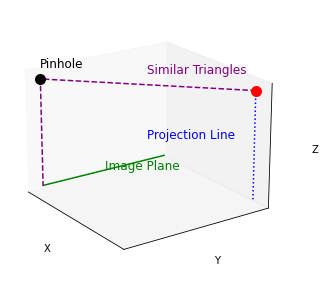

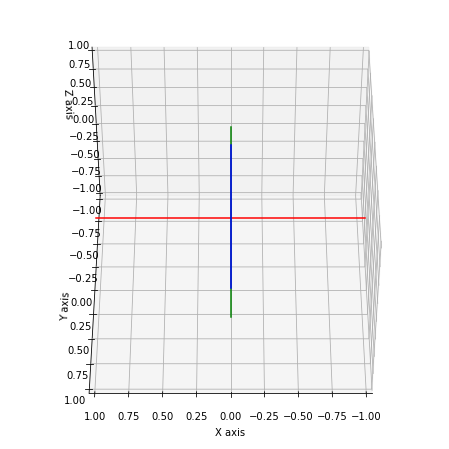

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a new matplotlib figure and axis with negative values on x and y
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Set axes labels
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')

# Set axes limits to include negative values
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Plotting the axes by creating lines for each axis
# Including negative values for x and y axes
axes = [
    [(-1, 0, 0), (1, 0, 0)],  # x-axis
    [(0, -1, 0), (0, 1, 0)],  # y-axis
    [(0, 0, -1), (0, 0, 1)]   # z-axis
]

# Colors for each axis
colors = ['r', 'g', 'b']

# Create the axes by plotting lines
for ax_line, color in zip(axes, colors):
    ax.plot(*zip(*ax_line), color=color)

# Adjust the view to rotate the figure 45 degrees around the x-axis
ax.view_init(elev=45, azim=90, )

# Show the plot with the new view angle
plt.show()


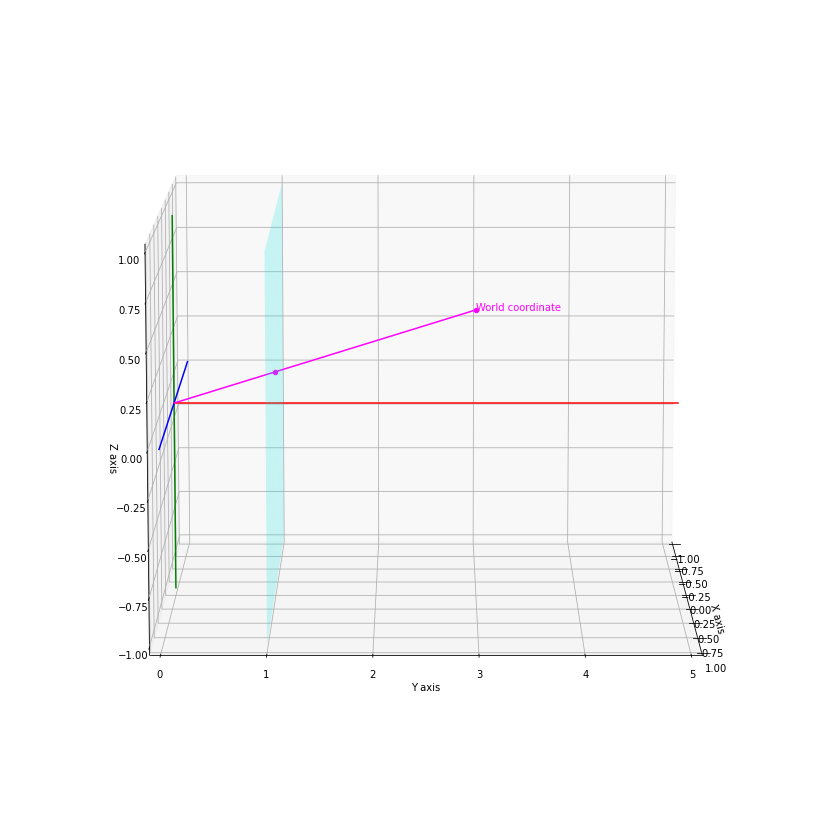

In [70]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create a new matplotlib figure and axis
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

# Set axes labels and limits
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_xlim([-1, 1])
ax.set_ylim([0, 5])
ax.set_zlim([-1, 1])

# Plotting the axes by creating lines for each axis
axes = [
    [(0, 0, 0), (0, 5, 0)],  # y-axis
    [(0, 0, -1), (0, 0, 1)],  # z-axis
    [(-1, 0, 0), (1, 0, 0)]   # x-axis
]
colors = ['r', 'g', 'b']  # Colors for each axis
for ax_line, color in zip(axes, colors):
    ax.plot(*zip(*ax_line), color=color)

# Adding the point (0.5, 6, 0.5) and labeling it
Xw = 0
Yw = 3
Zw = 0.5

world_coord = (Xw, Yw, Zw)

ax.scatter(*world_coord, color='magenta')
ax.text(Xw, Yw, Zw, "World coordinate", color='magenta')

# Drawing a line from the origin to the point
ax.plot([0, world_coord[0]], [0, world_coord[1]], [0, world_coord[2]], color='magenta')

# Creating a plane normal to the y-axis centered at (0, 1, 0)
x = np.linspace(-1, 1, 10)
z = np.linspace(-1, 1, 10)
X, Z = np.meshgrid(x, z)
Y = np.ones_like(X)  # Plane centered at y = 1

# Adding the plane with transparency
ax.plot_surface(X, Y, Z, color='cyan', alpha=0.2)

# The intersection point where the magenta line intersects the plane Y = 1

intersection_point = (Xw/Yw, Yw/Yw, Zw/Yw)
ax.scatter(*intersection_point, color='magenta')

# Adjust view
ax.view_init(elev=10, azim=0)

# Show the plot
plt.show()
